Hyperparameter 
To Select how many hidden layer and neurons in a neural network 

In [ ]:
#Importing all the necessary libraries 

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Activation, Embedding, Flatten, LeakyReLU, BatchNormalization, Dropout
from keras.activations import relu, sigmoid
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
# Loading dataset 
df=pd.read_csv("Customer_Churn_Modelling.csv")

In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Then Dividing data into dependent and independent variables

In [ ]:
# Independent variables
X=df.iloc[:,3:13]
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [ ]:
# dependent variables
y=df['Exited']
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [ ]:
#Encoding categorical data
from sklearn.preprocessing import LabelEncoder
l1=LabelEncoder()
X['Geography']=l1.fit_transform(X['Geography'])
l2=LabelEncoder()
X['Gender']=l2.fit_transform(X['Gender'])

In [ ]:
# creating dummy
X=pd.get_dummies(X,drop_first=True,columns=['Geography'])

In [ ]:
#Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
# Feature Scaling
Scaler=StandardScaler()
X_train=Scaler.fit_transform(X_train)
X_test=Scaler.transform(X_test)



In [ ]:
# importing kerasClassifier and GridSearchCV for Hyperparameter
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
# Creating model 
def create_model(layers, activation):
    model = Sequential()
    for i, nodes in enumerate(layers):
        if i==0:
            model.add(Dense(nodes,input_dim=X_train.shape[1]))
            model.add(Activation(activation))
            model.add(Dropout(0.3))
        else:
            model.add(Dense(nodes))
            model.add(Activation(activation))
            model.add(Dropout(0.3))
            
    model.add(Dense(units = 1, kernel_initializer= 'glorot_uniform', activation = 'sigmoid'))
    
    model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])
    return model
    
model = KerasClassifier(build_fn=create_model, verbose=0)

In [ ]:
model

In [ ]:
# Creating options for layers and activation and using GridSearchCV for best model...
layers=[(20,),(40,20),(45,30,15)]
activations=['sigmoid','relu']
param_grid = dict(layers=layers, activation=activations, batch_size = [128, 256], epochs=[30])
grid=GridSearchCV(estimator=model,param_grid=param_grid)

In [ ]:
grid_result = grid.fit(X_train, y_train) # training model

In [ ]:
print(grid_result.best_score_,grid_result.best_params_) # result of hyperparameter

0.8556249976158142 {'activation': 'relu', 'batch_size': 128, 'epochs': 30, 'layers': (45, 30, 15)}


In [ ]:
y_pred=grid.predict(X_test)  # Prediction

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
y_predict=(y_pred > 0.5) # to get the value in 0 or 1...

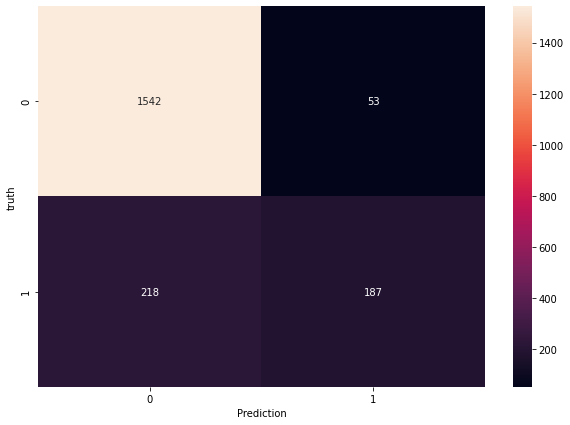

In [ ]:
# printing confusion metrix using seaborn and accuracy_score...
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predict)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('truth')
plt.show()

In [ ]:
accuracy_score(y_test,y_pred)  # accuracy score

0.8645